In [1]:
# Upload kaggle.json
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json"


In [2]:
# Ubah permission file
!chmod 600 /content/kaggle.json


In [3]:
# Setup Kaggle environment
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"


In [4]:
!kaggle datasets download -d yaspinan/makanan-khas-daerah


 97% 111M/115M [00:00<00:00, 154MB/s] 
100% 115M/115M [00:00<00:00, 131MB/s]


In [5]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = 'makanan-khas-daerah.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/makanan-khas/')
zip_ref.close()

In [6]:
# Menghapus berkas zip yang sudah tidak diperlukan
!rm makanan-khas-daerah.zip

Data understanding


In [7]:
# Mendefinisikan direktori utama dataset
base_dir = '/content/makanan-khas/Dataset'

In [8]:
print(os.listdir(base_dir))

['Keripik Balado Padang', 'Bakpia Jogja', 'Dodol Garut', 'Kembang Goyang Jakarta', 'Kue Lapis Surabaya', 'Pie Susu Bali', 'Lumpia Semarang']


In [9]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 577


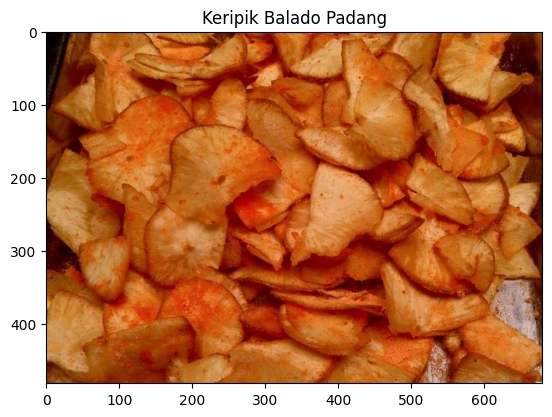

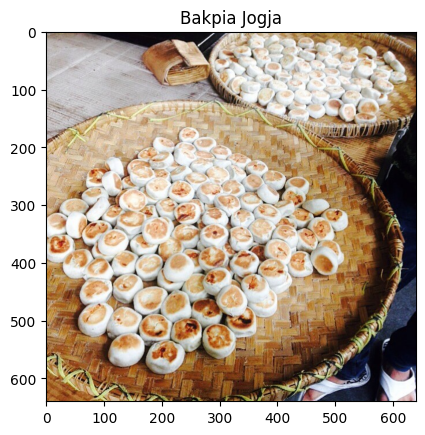

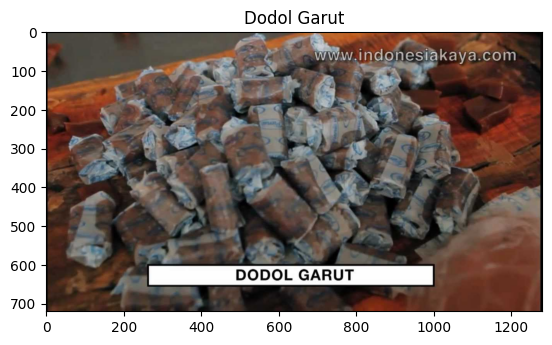

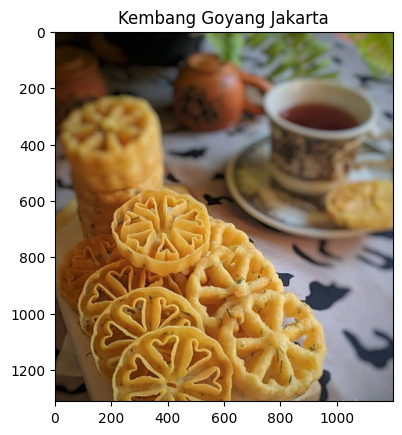

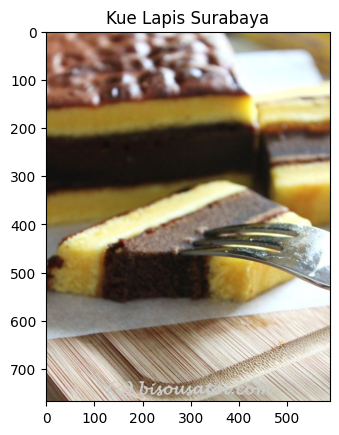

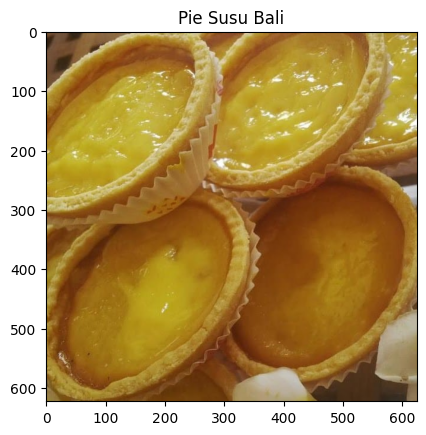

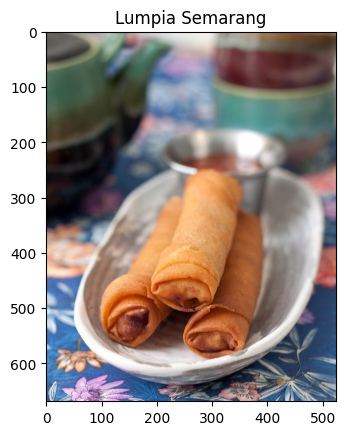

In [10]:
# Menampilkan sampel gambar tiap kelas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_each_class = 1
img_samples = {}
classes = list(number_label.keys())


for c in classes:
    temp = os.listdir(os.path.join(base_dir, c))[:img_each_class]
    for item in temp:
        img_path = os.path.join(base_dir, c, item)
        img_samples[c] = img_path

for i in img_samples:
    fig = plt.gcf()
    img = mpimg.imread(img_samples[i])
    plt.title(i)
    plt.imshow(img)
    plt.show()

Data Preparation

In [11]:
IMAGE_SIZE = (200,200)
BATCH_SIZE = 32
SEED = 999

In [12]:
# Menggunakan ImageDataGenerator untuk preprocessing
import tensorflow as tf

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2
)


In [13]:
# Menyiapkan data train dan data validation
train_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='training',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

valid_data = datagen.flow_from_directory(
    base_dir,
    class_mode='categorical',
    subset='validation',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED
)

Found 465 images belonging to 7 classes.
Found 112 images belonging to 7 classes.


In [14]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.Rescaling(1./255)
  ]
)

In [15]:
from tensorflow.keras import  layers, models, optimizers
# Membuat arsitektur model CNN
def create_model():
  model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(7, activation='softmax')
])


# Compiling model
  model.compile(
        loss='categorical_crossentropy',
        optimizer=tf.keras.optimizers.Adam(),
        metrics=['accuracy']
  )

  return model

In [16]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 256)      

In [17]:
# Training model CNN
history = model.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
15/15 [==============================] - 15s 491ms/step - loss: 3.9398 - accuracy: 0.1871 - val_loss: 1.8917 - val_accuracy: 0.2321
Epoch 2/10
15/15 [==============================] - 6s 408ms/step - loss: 1.8664 - accuracy: 0.2301 - val_loss: 1.7343 - val_accuracy: 0.3304
Epoch 3/10
15/15 [==============================] - 7s 461ms/step - loss: 1.6830 - accuracy: 0.3204 - val_loss: 1.5517 - val_accuracy: 0.4018
Epoch 4/10
15/15 [==============================] - 7s 460ms/step - loss: 1.6093 - accuracy: 0.3484 - val_loss: 1.5989 - val_accuracy: 0.3661
Epoch 5/10
15/15 [==============================] - 6s 405ms/step - loss: 1.5434 - accuracy: 0.3849 - val_loss: 1.4388 - val_accuracy: 0.4554
Epoch 6/10
15/15 [==============================] - 6s 403ms/step - loss: 1.4781 - accuracy: 0.4000 - val_loss: 1.4753 - val_accuracy: 0.4018
Epoch 7/10
15/15 [==============================] - 8s 505ms/step - loss: 1.4736 - accuracy: 0.4108 - val_loss: 1.4887 - val_accuracy: 0.4375
Epoch

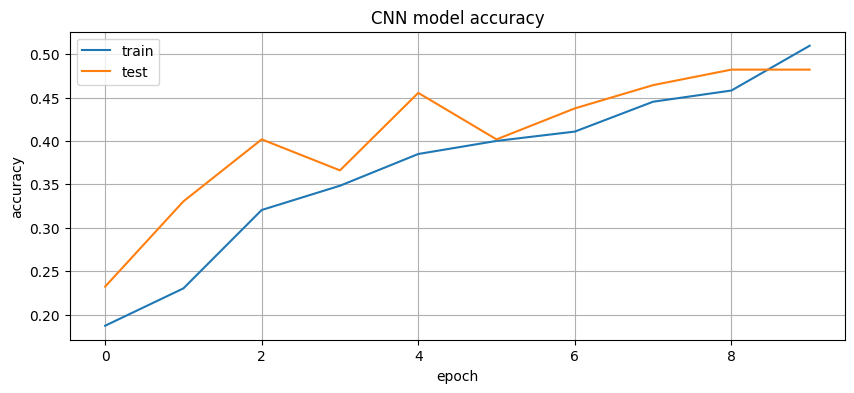

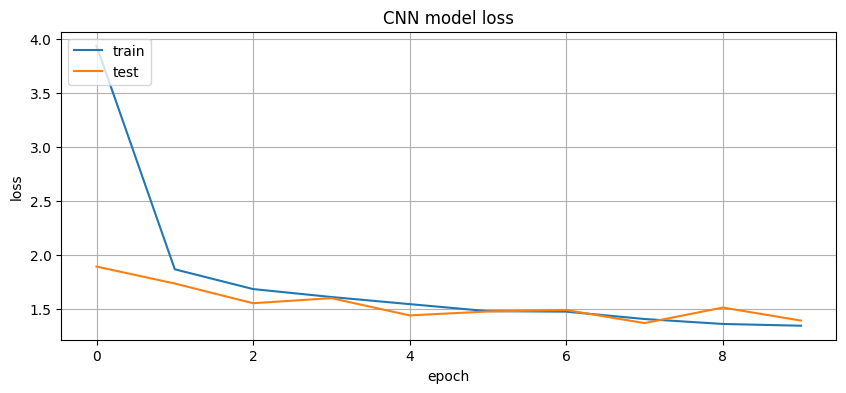

In [18]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()


In [19]:
# Loading DenseNet201 model
base_densenet_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
                                                        pooling='max')
base_densenet_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 0s 0us/step


In [20]:
# Transfer learning DenseNet201
densenet_model = tf.keras.models.Sequential([
  data_augmentation,
  base_densenet_model,
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(7, activation='softmax')
])

# Compiling model
densenet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
  )

In [29]:
# Melatih model DenseNet201
densenet_hist = densenet_model.fit(
    train_data,
    epochs=15,
    validation_data = valid_data
)

Epoch 1/15
15/15 [==============================] - 11s 760ms/step - loss: 0.2882 - accuracy: 0.9011 - val_loss: 0.2060 - val_accuracy: 0.9464
Epoch 2/15
15/15 [==============================] - 6s 419ms/step - loss: 0.2843 - accuracy: 0.9011 - val_loss: 0.2624 - val_accuracy: 0.9107
Epoch 3/15
15/15 [==============================] - 7s 433ms/step - loss: 0.2667 - accuracy: 0.9118 - val_loss: 0.2282 - val_accuracy: 0.9286
Epoch 4/15
15/15 [==============================] - 6s 434ms/step - loss: 0.2621 - accuracy: 0.9204 - val_loss: 0.1700 - val_accuracy: 0.9554
Epoch 5/15
15/15 [==============================] - 7s 460ms/step - loss: 0.2207 - accuracy: 0.9161 - val_loss: 0.2041 - val_accuracy: 0.9464
Epoch 6/15
15/15 [==============================] - 8s 480ms/step - loss: 0.2413 - accuracy: 0.9161 - val_loss: 0.1971 - val_accuracy: 0.9554
Epoch 7/15
15/15 [==============================] - 6s 420ms/step - loss: 0.2102 - accuracy: 0.9269 - val_loss: 0.1890 - val_accuracy: 0.9464
Epoch

In [30]:
# Menampilkan daftar kelas atau label gambar
train_data.class_indices

{'Bakpia Jogja': 0,
 'Dodol Garut': 1,
 'Kembang Goyang Jakarta': 2,
 'Keripik Balado Padang': 3,
 'Kue Lapis Surabaya': 4,
 'Lumpia Semarang': 5,
 'Pie Susu Bali': 6}

Saving Screenshot 2023-12-14 131159.png to Screenshot 2023-12-14 131159.png
1/1 [==============================] - 0s 36ms/step
Screenshot 2023-12-14 131159.png

Kue Lapis adalah salah satu kue tradisional Indonesia yang terdiri dari lapisan-lapisan yang terbuat dari campuran tepung beras, santan, gula, dan pewarna alami. Proses pembuatannya melibatkan menuangkan lapisan demi lapisan adonan ke dalam loyang dan dikukus hingga matang. Biasanya, kue ini memiliki dua lapisan warna, seperti putih dan merah, atau warna-warna lainnya yang menarik.Fun fact tentang kue lapis adalah bahwa proses pembuatannya membutuhkan ketelitian yang tinggi untuk mendapatkan lapisan yang rapi dan presisi. Selain itu, karena penggunaan bahan alami dalam pewarnaan, beberapa variasi kue lapis menggunakan bahan seperti pandan untuk hijau atau ubi ungu untuk merah muda, menambahkan aroma dan rasa yang khas.Kue Lapis sering dihadirkan dalam berbagai acara, termasuk perayaan seperti Lebaran atau acara spesial lainnya

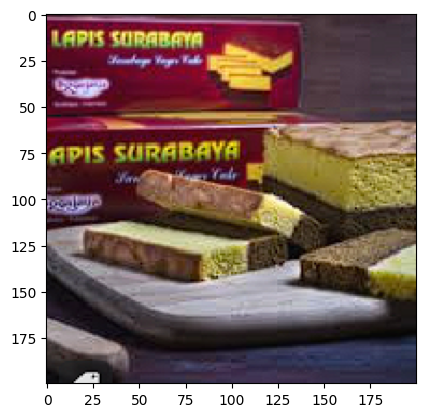

In [31]:
# Menguji coba model
import numpy as np
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMAGE_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = densenet_model.predict(images, batch_size=BATCH_SIZE)
  classes = np.argmax(classes)

  print(fn)
  if classes==0:
    print('''
    \rBakpia adalah kue tradisional dari Yogyakarta, Indonesia, yang terkenal dengan isian kacang hijau atau ubi yang manis. \"Bakpia\" sendiri merupakan kata serapan dari bahasa Hokkien yang artinya \"kue kacang\". Fun fact-nya adalah bahwa bakpia diperkirakan pertama kali dibawa ke Indonesia oleh imigran Tionghoa pada abad ke-20 dan telah menjadi salah satu oleh-oleh khas yang populer bagi para wisatawan yang mengunjungi Yogyakarta."
''')
  elif classes==1:
    print('''
    \rDodol adalah makanan manis yang populer di Indonesia dan beberapa negara Asia Tenggara lainnya. Ini adalah perpaduan antara gula, santan, dan tepung beras atau tepung ketan yang dimasak hingga menjadi padat dengan tekstur yang kenyal.Fun fact tentang dodol adalah proses pembuatannya memakan waktu yang cukup lama dan membutuhkan kesabaran. Proses memasak dodol bisa memakan waktu hingga beberapa jam dengan terus-menerus mengaduk adonan yang panas di atas api. Dodol sering kali dianggap sebagai simbol kebersamaan dan kerjasama, karena dalam proses pembuatannya membutuhkan kerja sama untuk terus mengaduk adonan agar tidak gosong dan merata panasnya. Dodol juga sering dihadirkan dalam berbagai perayaan dan acara penting di Indonesia.
    ''')
  elif classes==2:
    print('''
    \rKembang goyang adalah salah satu jenis camilan tradisional Indonesia yang terbuat dari adonan tepung beras yang digoreng hingga mengembang dan menjadi keriting seperti bunga. Camilan ini biasanya diberi taburan gula halus atau gula pasir setelah digoreng untuk memberikan rasa manis.Fun fact tentang kembang goyang adalah proses pembuatannya yang memerlukan keahlian khusus untuk menghasilkan bentuk yang cantik dan mengembang sempurna. Biasanya, adonan tepung beras diletakkan di dalam corong khusus yang bisa digerakkan dengan tangan sehingga adonan dapat dituangkan ke dalam wajan berisi minyak panas dalam gerakan yang membuat adonan membentuk pola seperti bunga yang indah."Selain itu, kembang goyang sering dianggap sebagai salah satu camilan yang menghadirkan kenangan masa kecil bagi banyak orang Indonesia karena keunikan bentuknya yang menarik dan rasanya yang manis.
    ''')
  elif classes==3:
    print('''
    \rKeripik singkong adalah camilan populer di Indonesia yang terbuat dari irisan tipis singkong yang kemudian digoreng hingga kering dan renyah. Singkong dipotong tipis, kadang-kadang dibumbui dengan berbagai rempah atau bumbu sesuai selera, kemudian digoreng hingga menjadi keripik yang garing dan lezat.Fun fact tentang keripik singkong adalah variasi rasa dan tekstur yang dapat diciptakan. Beberapa produsen keripik singkong menggunakan bumbu pedas, gurih, manis, atau bahkan rasa-rasa unik seperti keju atau barbeque untuk menambah variasi rasa yang menarik bagi konsumen. Keripik singkong juga memiliki nilai nutrisi karena singkong kaya akan karbohidrat, serat, dan beberapa nutrisi lainnya.Selain menjadi camilan favorit di Indonesia, keripik singkong juga sering dijadikan oleh-oleh yang populer bagi wisatawan yang berkunjung ke daerah-daerah di Indonesia yang terkenal dengan produksi keripik singkongnya.
    ''')
  elif classes==4:
    print('''
    \rKue Lapis adalah salah satu kue tradisional Indonesia yang terdiri dari lapisan-lapisan yang terbuat dari campuran tepung beras, santan, gula, dan pewarna alami. Proses pembuatannya melibatkan menuangkan lapisan demi lapisan adonan ke dalam loyang dan dikukus hingga matang. Biasanya, kue ini memiliki dua lapisan warna, seperti putih dan merah, atau warna-warna lainnya yang menarik.Fun fact tentang kue lapis adalah bahwa proses pembuatannya membutuhkan ketelitian yang tinggi untuk mendapatkan lapisan yang rapi dan presisi. Selain itu, karena penggunaan bahan alami dalam pewarnaan, beberapa variasi kue lapis menggunakan bahan seperti pandan untuk hijau atau ubi ungu untuk merah muda, menambahkan aroma dan rasa yang khas.Kue Lapis sering dihadirkan dalam berbagai acara, termasuk perayaan seperti Lebaran atau acara spesial lainnya sebagai simbol keberuntungan dan kesuksesan dalam budaya Indonesia.
    ''')
  elif classes==5:
    print('''
    \rLumpia adalah hidangan yang terkenal di Indonesia, berupa gulungan kulit tipis yang diisi dengan berbagai bahan, seperti rebung, wortel, daging cincang, udang, atau campuran sayuran lainnya. Kemudian lumpia ini digoreng hingga kulitnya menjadi renyah.Fun fact tentang lumpia adalah variasi yang ada dalam pembuatannya. Ada dua jenis lumpia yang populer di Indonesia: lumpia goreng (yang digoreng) dan lumpia basah (yang tidak digoreng dan sering disajikan dengan saus). Lumpia merupakan contoh makanan yang diadaptasi dari masakan Tionghoa yang kemudian menjadi salah satu makanan yang sangat populer di Indonesia.Lumpia juga sering disajikan sebagai camilan atau hidangan pembuka dalam berbagai acara, mulai dari acara keluarga hingga acara besar seperti pernikahan. Versatilitasnya dalam isiannya membuatnya disukai oleh banyak orang karena dapat disesuaikan dengan preferensi masing-masing.
    ''')
  else:
    print('''
    \rPie susu adalah kue yang terkenal dari Bali, Indonesia. Kue ini terdiri dari kulit pie yang tipis dan renyah yang diisi dengan campuran susu, telur, gula, dan rempah-rempah seperti kayu manis. Isian ini kemudian dipanggang hingga matang.Fun fact tentang pie susu adalah kelezatannya yang memikat banyak orang dan sering dijadikan oleh-oleh khas dari Bali. Setiap produsen pie susu memiliki resep rahasia mereka sendiri untuk menciptakan rasa yang unik dan istimewa. Selain itu, pie susu juga sering dianggap sebagai simbol dari Bali dan menjadi oleh-oleh favorit bagi wisatawan yang berkunjung ke pulau tersebut.
    ''')

In [24]:
densenet_model.save('model-makanan-khas-daerah.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
converter = tf.lite.TFLiteConverter.from_keras_model(densenet_model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model-makanan-khas-daerah.tflite', 'wb') as f:
  f.write(tflite_model)

In [26]:
import pickle

# Konversi model ke format TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(densenet_model)
tflite_model = converter.convert()

# Simpan model TFLite ke dalam format pickle
with open('model-makanan-khas-daerah.pkl', 'wb') as f:
    pickle.dump(tflite_model, f)

In [27]:
# Instal TensorflowJS
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 92.5 MB/s eta 0:00:00


In [28]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model-makanan-khas-daerah.h5/content/modeltfjs

2023-12-21 08:29:34.483544: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 08:29:34.483596: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 08:29:34.484797: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 08:29:35.637063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 5, in <module>
    from tensorflowjs.converters.converter import pip_main
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/__init__.py", line